In [1]:
# Getting the data
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhiraj6898","key":"a9feb32448449aaf5df53c0df111a5f0"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vermaavi/food11

100% 2.17G/2.17G [00:35<00:00, 64.3MB/s]



In [0]:
!unzip food11.zip

In [0]:
!rm -r food-11

In [7]:
# Importing neccessary packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd
import seaborn as sns

In [8]:
os.listdir('.')

['.config',
 'validation',
 'food11.zip',
 'evaluation',
 'drive',
 'training',
 'kaggle.json',
 'sample_data']

### Data preparation

The dataset is seperated into 3 folders: training, validation and evaluation.
The images are named by convention as: {class_id}-{image_id}.jpg. Create subfolders inside training and validation for ImageDataGenerator to recognize classes.

In [10]:
NUM_CLASSES = 11

In [12]:
classes_list = [
    'Bread',
    'Dairyproduct', 
    'Dessert', 
    'Egg', 
    'Friedfood', 
    'Meat', 
    'NoodlesPasta', 
    'Rice', 
    'Seafood', 
    'Soup', 
    'VegetableFruit'
]

In [13]:
def prepare_data(folder):
    
    # Creating subdirectories for 11 classes.
    for i in range(NUM_CLASSES):
        os.mkdir(path=folder + classes_list[i])
        
    # Move the images to specific directories
    for path in os.listdir(folder):
        if os.path.isdir(folder + path) == False:
            file_array = path.split('_')
            os.rename(folder + path, folder + classes_list[int(file_array[0])] + '/' + file_array[1])

In [12]:
%%time
# Copy images to particular class for training and validation
prepare_data('./training/')
prepare_data('./validation/')
prepare_data('./evaluation/')

CPU times: user 17.6 ms, sys: 361 ms, total: 379 ms
Wall time: 384 ms


### Finding data distribution

In [16]:
def get_data_distribution():
    
    training_per_class = {}
    validation_per_class = {}
    test_data = 0
    training_data = 0
    validation_data = 0
    
    for i in range(NUM_CLASSES):
        training_per_class[i] = len(os.listdir('./training/' + str(classes_list[i])))
        validation_per_class[i] = len(os.listdir('./validation/' + str(classes_list[i])))
        
    training_data = sum(list(training_per_class.values()))
    validation_data = sum(list(validation_per_class.values()))
    test_data = len(os.listdir('./evaluation/'))
    
    print('Training data size: ' + str(training_data))
    print('Validation data size: ' + str(validation_data))
    print('Test data size: ' + str(test_data))
    total = training_data + validation_data + test_data
    print('\nTraining set proportion: ' + str(training_data / total))
    print('Validation set proportion: ' + str(validation_data / total))
    print('Testing set proportion: ' + str(test_data / total))

    return training_per_class, validation_per_class

In [17]:
training_per_class, validation_per_class = get_data_distribution()

Training data size: 9866
Validation data size: 3430
Test data size: 11

Training set proportion: 0.7414142932291276
Validation set proportion: 0.2577590741714887
Testing set proportion: 0.0008266325993837829


In [18]:
training_per_class = pd.DataFrame.from_dict(training_per_class, orient='index', columns=['freq'])
validation_per_class = pd.DataFrame.from_dict(validation_per_class, orient='index', columns=['freq'])

In [19]:
training_per_class['class'] = training_per_class.index
validation_per_class['class'] = validation_per_class.index

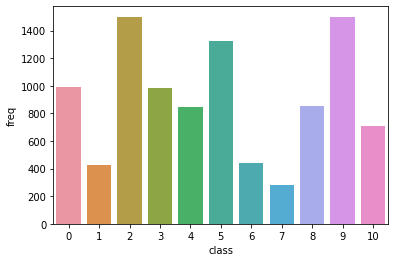

In [20]:
sns.barplot(x='class', y='freq', data=training_per_class)

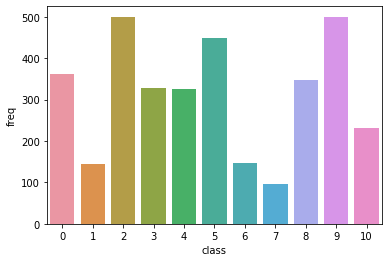

In [21]:
sns.barplot(x='class', y='freq', data=validation_per_class)

### Observations:

It appears that data in both training and validation set for each class is proportionally same. This will not cause any data mismatch problem while training model.

In [25]:
def load_sample_image(target_dim):
    image = tf.keras.preprocessing.image.load_img('./training/Bread/0.jpg', target_size=(target_dim, target_dim))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image / 255
    return image

In [26]:
image = load_sample_image(512)

Image shape: (512, 512, 3)


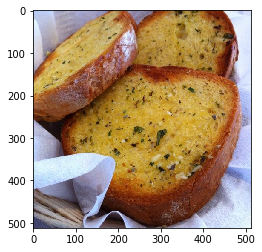

In [27]:
print("Image shape: " + str(image.shape))
plt.imshow(image)

Image shape: (224, 224, 3)


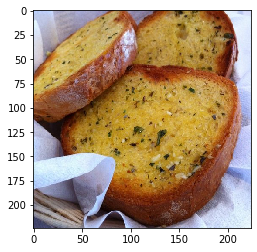

In [28]:
image = load_sample_image(224)
print("Image shape: " + str(image.shape))
plt.imshow(image)